In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.core import inner

df = pd.read_csv("../data/processed/movielens-32m_global_temporal_split/test.csv", names="user_id,movie_id,rating,timestamp".split(","))
print(df.head())
print("Average movies per user in test set:", len(df) / df['user_id'].nunique())
print("User with least movies in test set:", df['user_id'].value_counts().min())
print("User with most movies in test set:", df['user_id'].value_counts().max())
print("Average ratings per user in test set:", df.groupby('user_id').size().mean())

   user_id  movie_id  rating   timestamp
0       22       316     3.0  1614575253
1       22    191489     3.5  1614575270
2       22    218867     3.0  1614575299
3       22    210271     2.5  1617155546
4       22    197889     4.0  1617162338
Average movies per user in test set: 75.41096757852077
User with least movies in test set: 1
User with most movies in test set: 3933
Average ratings per user in test set: 75.41096757852077


                        user_id     item_id  rating      timestamp
0  AEVPPTMG43C6GWSR7I2UGRQN7WFQ  B07FC9NRRR     5.0  1645891709826
1  AEVPPTMG43C6GWSR7I2UGRQN7WFQ  B07S68J4BS     3.0  1645892301611
2  AEVPPTMG43C6GWSR7I2UGRQN7WFQ  B0BWMPGJDB     5.0  1645892473297
3  AEVPPTMG43C6GWSR7I2UGRQN7WFQ  B07K21CYV5     5.0  1666302032709
4  AFSKPY37N3C43SOI5IEXEK5JSIYA  B095396NQ4     5.0  1641841635478
Average items per user in test set: 2.15640552387858
User with least items in test set: 1
User with most items in test set: 64
Average ratings per user in test set: 2.15640552387858


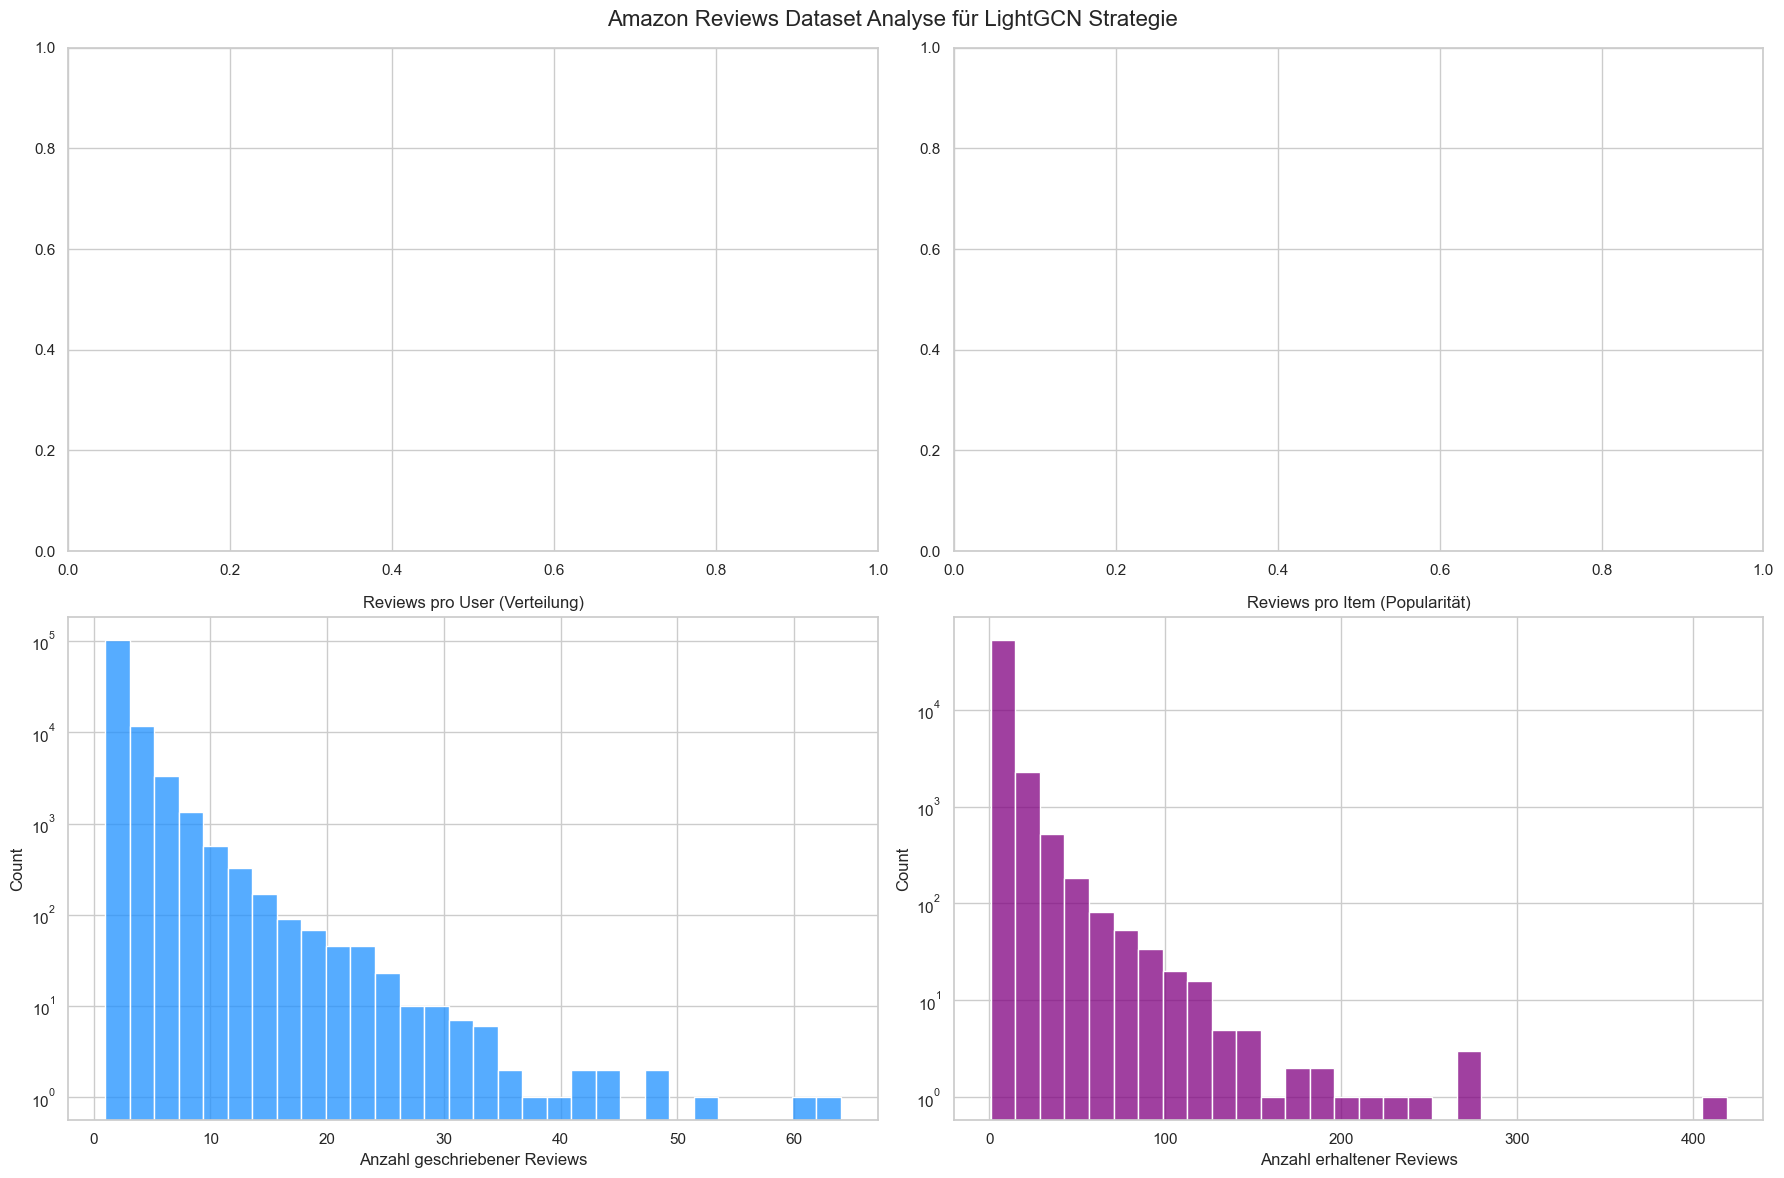

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/sports_and_outdoors_global_temporal_split/test.csv", names="user_id,item_id,rating,timestamp".split(","))
print(df.head())
print("Average items per user in test set:", len(df) / df['user_id'].nunique())
print("User with least items in test set:", df['user_id'].value_counts().min())
print("User with most items in test set:", df['user_id'].value_counts().max())
print("Average ratings per user in test set:", df.groupby('user_id').size().mean())

sns.set_theme(style="whitegrid")

# Erstellen einer Figure mit Subplots für Übersichtlichkeit
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Amazon Reviews Dataset Analyse für LightGCN Strategie', fontsize=16)
user_counts = df['user_id'].value_counts()

# Histogramm der User-Interaktionen (log scale ist hier oft nötig bei echten Daten)
sns.histplot(ax=axes[1, 0], x=user_counts, bins=30, kde=False, color='dodgerblue')
axes[1, 0].set_title('Reviews pro User (Verteilung)')
axes[1, 0].set_xlabel('Anzahl geschriebener Reviews')
axes[1, 0].set_yscale('log') # Log-Skala, da Amazon Daten "Long Tail" sind

# ---------------------------------------------------------
# PLOT D: Item Popularität
# Wichtig für: Wie stark bias das Modell zu populären Items tendieren wird
# ---------------------------------------------------------
item_counts = df['item_id'].value_counts()

sns.histplot(ax=axes[1, 1], x=item_counts, bins=30, kde=False, color='purple')
axes[1, 1].set_title('Reviews pro Item (Popularität)')
axes[1, 1].set_xlabel('Anzahl erhaltener Reviews')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()



# Upper Bounds of Recall in the Metrics

In [2]:
import pandas as pd
df_train = pd.read_csv("../data/processed/sports_and_outdoors_global_temporal_split/train.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])
df_test = pd.read_csv("../data/processed/sports_and_outdoors_global_temporal_split/test.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])

In [6]:
import pandas as pd
df_train = pd.read_csv("../data/processed/movielens-32m_global_temporal_split/train.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])
df_test = pd.read_csv("../data/processed/movielens-32m_global_temporal_split/test.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])

In [12]:
item_ids_train = set(df_train['item_id'].unique())
item_ids_test = set(df_test['item_id'].unique())
overlap_score = len(item_ids_train.intersection(item_ids_test)) / len(item_ids_test)
print("Item Overlap between Train and Test sets:", overlap_score)
cold_items = set(item_ids_test.difference(item_ids_train))
print("Number of cold items in test: ", len(cold_items))
print(cold_items)
print(len(df_train), len(item_ids_train))
print(df_test['user_id'].nunique())

Item Overlap between Train and Test sets: 1.0
Number of cold items in test:  0
set()
2977785 142212
121364


In [13]:
reranked_users = pd.read_csv("../data/reranked/sports_outdoors_reranked_gemma3_sample_10.csv")
original_users = pd.read_csv("../data/retrieved/sports_outdoors_5core/ver_0.4_sports_outdoors_candidates.csv")
reranked_user_ids = set(reranked_users['user_id'].unique())
original_users_lists = original_users[original_users['user_id'].isin(reranked_user_ids)]
print(len(original_users_lists))
pd.DataFrame.to_csv(original_users_lists, "../data/retrieved/sports_outdoors_5core/ver_0.4_sports_outdoors_candidates_reranked_users_only.csv", index=False)

300


# Exploration of users with recall of 0 vs. non 0

In [3]:
import pandas as pd
df_candidates = pd.read_csv("../data/retrieved/sports_outdoors_5core/ver_0.4_sports_outdoors_candidates.csv")
df_reranked = pd.read_csv("../data/reranked/sports_outdoors_reranked_gemma3_sample_350.csv")
df_ground_truth = pd.read_csv("../data/processed/sports_and_outdoors_global_temporal_split/test.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])


In [2]:
df_candidates.head()

,user_id,item_id,rank,score
0,AE2233IKA2327CVE7WFSJVHDTPOA,B079YGMTLT,1,14.779563
1,AE2233IKA2327CVE7WFSJVHDTPOA,B009MA0TR8,2,13.353528
2,AE2233IKA2327CVE7WFSJVHDTPOA,B0C6JLLHXZ,3,12.716145
3,AE2233IKA2327CVE7WFSJVHDTPOA,B07F7V5W18,4,12.321336
4,AE2233IKA2327CVE7WFSJVHDTPOA,B00NSH3IRE,5,10.942898


In [4]:
df_ground_truth.head()

,user_id,item_id,rating,timestamp
0,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,B07FC9NRRR,5.0,1645891709826
1,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,B07S68J4BS,3.0,1645892301611
2,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,B0BWMPGJDB,5.0,1645892473297
3,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,B07K21CYV5,5.0,1666302032709
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,B095396NQ4,5.0,1641841635478


Total Users: 7896
Users with Hits (Recall > 0): 3467
Verteilung der Hits (Anzahl Hits -> Anzahl User):
1     1333
2      665
3      381
4      255
5      209
6      131
7      114
8       75
9       70
10      43
11      36
12      25
13      26
14      18
15      13
16      25
17       5
18      11
19       9
20       6
21       6
22       2
23       3
24       3
27       1
28       1
29       1
Name: count, dtype: int64


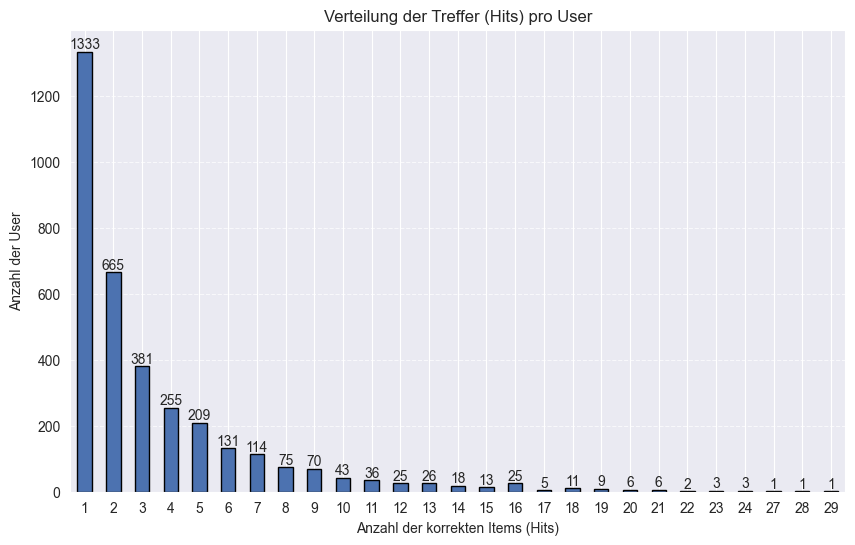

In [7]:
# 1. Identify "Hits" by merging candidates and ground truth
# An inner merge keeps only the rows where User AND Item match in both files
hits_df = pd.merge(df_candidates, df_ground_truth, on=['user_id', 'item_id'])

# 2. Get the list of unique Users who had at least one hit
users_with_hits = hits_df['user_id'].unique()

# 3. Create the filtered DataFrames (keeping only users with Recall > 0)
df_candidates_filtered = df_candidates[df_candidates['user_id'].isin(users_with_hits)].copy()
df_ground_truth_filtered = df_ground_truth[df_ground_truth['user_id'].isin(users_with_hits)].copy()

# Print stats
print(f"Total Users: {df_candidates['user_id'].nunique()}")
print(f"Users with Hits (Recall > 0): {len(users_with_hits)}")

import matplotlib.pyplot as plt

# 1. Finde alle "Hits" durch einen Inner Join
hits_df = pd.merge(df_candidates, df_ground_truth, on=['user_id', 'item_id'])

# 2. Zähle die Hits pro User
# Das Ergebnis ist eine Serie: Index = user_id, Wert = Anzahl der Hits
hits_per_user = hits_df.groupby('user_id').size()

# 3. Berechne die Verteilung (Wie viele User haben 1 Hit, wie viele 2, etc.)
hit_distribution = hits_per_user.value_counts().sort_index()

# Text-Ausgabe der Daten
print("Verteilung der Hits (Anzahl Hits -> Anzahl User):")
print(hit_distribution)

# 4. Visualisierung
plt.figure(figsize=(10, 6))
ax = hit_distribution.plot(kind='bar', color='#4c72b0', edgecolor='black')

plt.title('Verteilung der Treffer (Hits) pro User')
plt.xlabel('Anzahl der korrekten Items (Hits)')
plt.ylabel('Anzahl der User')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Zahlen über die Balken schreiben
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

In [6]:
# same thing for movielens
df_candidates = pd.read_csv("../data/retrieved/movielens-32m/ver_0.4_movielens_candidates.csv")
#df_reranked = pd.read_csv("../data/reranked/sports_outdoors_reranked_gemma3_sample_350.csv")
df_ground_truth = pd.read_csv("../data/processed/movielens-32m_global_temporal_split/test.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])
hits_df = pd.merge(df_candidates, df_ground_truth, on=['user_id', 'item_id'])

# 2. Get the list of unique Users who had at least one hit
users_with_hits = hits_df['user_id'].unique()

# 3. Create the filtered DataFrames (keeping only users with Recall > 0)
df_candidates_filtered = df_candidates[df_candidates['user_id'].isin(users_with_hits)].copy()
df_ground_truth_filtered = df_ground_truth[df_ground_truth['user_id'].isin(users_with_hits)].copy()

# Print stats
print(f"Total Users: {df_candidates['user_id'].nunique()}")
print(f"Users with Hits (Recall > 0): {len(users_with_hits)}")

Total Users: 7896
Users with Hits (Recall > 0): 3467


# Compare reranked scores with ground truth ratings (next 3 cells)

In [15]:
import pandas as pd
df_initial = pd.read_csv("temp.csv")
df_reranked = pd.read_csv("../data/reranked/sports_outdoors_reranked_azure_batch-v02.csv")

In [21]:
df_combined = pd.merge(df_initial, df_reranked, on=['user_id', 'item_id'])
print(df_combined)

                         user_id     item_id  rank_x      score  rank_y
0   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BX4ZDSTQ       1   6.841186       1
1   AE23SPKB6U244ZEX6IH7QIIL2AQA  B082PX9D76       2   6.337325       2
2   AE23SPKB6U244ZEX6IH7QIIL2AQA  B07SBBVTMN       3   6.299952       8
3   AE23SPKB6U244ZEX6IH7QIIL2AQA  B001B6RGXG       4   6.288302       6
4   AE23SPKB6U244ZEX6IH7QIIL2AQA  B00142MD62       5   6.126693       7
5   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BWFK1MKG       6   6.119340       4
6   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BX2WK4V4       7   5.952084      21
7   AE23SPKB6U244ZEX6IH7QIIL2AQA  B015IEJ0GC       8   5.944908       3
8   AE23SPKB6U244ZEX6IH7QIIL2AQA  B09BQWLGHB       9   5.779760      22
9   AE23SPKB6U244ZEX6IH7QIIL2AQA  B00GQOW71E      10   5.669387      12
10  AE23SPKB6U244ZEX6IH7QIIL2AQA  B007FP6NB8      11   5.631753      23
11  AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BY92K9KH      12   5.485204       9
12  AE23SPKB6U244ZEX6IH7QIIL2AQA  B0028YUZSS      13   5.465758 

In [22]:
df_ground_truth = pd.read_csv("../data/processed/sports_and_outdoors_global_temporal_split/test.csv", names=['user_id', 'item_id', 'rating', 'timestamp'])
df_ground_truth.drop(columns=['timestamp'], inplace=True)
df_combined = pd.merge(df_combined, df_ground_truth, how="left", on=[ 'user_id', 'item_id'])
df_combined.drop(columns=["score"], inplace=True)
print(df_combined)

                         user_id     item_id  rank_x  rank_y  rating
0   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BX4ZDSTQ       1       1     NaN
1   AE23SPKB6U244ZEX6IH7QIIL2AQA  B082PX9D76       2       2     NaN
2   AE23SPKB6U244ZEX6IH7QIIL2AQA  B07SBBVTMN       3       8     NaN
3   AE23SPKB6U244ZEX6IH7QIIL2AQA  B001B6RGXG       4       6     NaN
4   AE23SPKB6U244ZEX6IH7QIIL2AQA  B00142MD62       5       7     5.0
5   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BWFK1MKG       6       4     NaN
6   AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BX2WK4V4       7      21     NaN
7   AE23SPKB6U244ZEX6IH7QIIL2AQA  B015IEJ0GC       8       3     NaN
8   AE23SPKB6U244ZEX6IH7QIIL2AQA  B09BQWLGHB       9      22     NaN
9   AE23SPKB6U244ZEX6IH7QIIL2AQA  B00GQOW71E      10      12     NaN
10  AE23SPKB6U244ZEX6IH7QIIL2AQA  B007FP6NB8      11      23     NaN
11  AE23SPKB6U244ZEX6IH7QIIL2AQA  B0BY92K9KH      12       9     NaN
12  AE23SPKB6U244ZEX6IH7QIIL2AQA  B0028YUZSS      13      10     NaN
13  AE23SPKB6U244ZEX6IH7QIIL2AQA  